# This notebook is for course Five : Regression (Supervised Learning)

### Importing Data Files

In [5]:
# The code was removed by Watson Studio for sharing.

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [6]:
#Import Transaction DataSet Here
body = client_1db92c7017d54886831046b32d9ea878.get_object(Bucket='project1-donotdelete-pr-fak4pf0yfksumo',Key='Transaction Data Set - Student 3 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transactions_data = pd.read_csv(body, sep='|')
transactions_data.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [7]:
#Import Customer Dataset Here
body = client_1db92c7017d54886831046b32d9ea878.get_object(Bucket='project1-donotdelete-pr-fak4pf0yfksumo',Key='Customer Data Set - Student 1 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customer_data = pd.read_csv(body)
customer_data.head()


,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing Data Types

In [8]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [9]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [10]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [11]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [12]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [13]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [14]:
customer_prod_categ=customer_prod_categ.reset_index()

In [15]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [16]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})

In [17]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )

In [18]:
customer_KPIs=customer_KPIs.fillna(0)


In [19]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [20]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Linear Regression 

In [21]:
#Begin Writing your code here
DF_input=customer_all_view[['GENDER','AGE','INCOME','EXPERIENCE SCORE','LOYALTY GROUP','HOUSEHOLD SIZE','MARITAL STATUS']]
DF_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,enrolled,4,Single
1,0,42,94475,9,notenrolled,6,Married
2,0,40,88610,9,enrolled,5,Married
3,0,38,84313,8,enrolled,1,Single
4,0,30,51498,3,notenrolled,1,Single


In [22]:
DF_input["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [23]:
pd.get_dummies(DF_input["MARITAL STATUS"]).head(10)

,Divorced,Married,Single,Widow/Widower
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,1,0,0
9,0,1,0,0


In [24]:
def encode_loyalty(value):
    if value == "enrolled" :
        return 1 
    else : 
        return 0

In [25]:
DF_input['LOYALTY GROUP']=DF_input['LOYALTY GROUP'].apply(encode_loyalty)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
DF_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,1,4,Single
1,0,42,94475,9,0,6,Married
2,0,40,88610,9,1,5,Married
3,0,38,84313,8,1,1,Single
4,0,30,51498,3,0,1,Single


In [27]:
#replaces the “DF_input” frame with the one-hot encoded Pandas data frame
DF_input=pd.get_dummies(DF_input)
DF_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0,64,133498,5,1,4,0,0,1,0
1,0,42,94475,9,0,6,0,1,0,0
2,0,40,88610,9,1,5,0,1,0,0
3,0,38,84313,8,1,1,0,0,1,0
4,0,30,51498,3,0,1,0,0,1,0


In [28]:
#min_max scaling
from sklearn import preprocessing
DF_input_column_names = DF_input.columns.values
DF_input_np=preprocessing.minmax_scale(DF_input)
Reg_input_scaled=pd.DataFrame(DF_input_np, columns=DF_input_column_names)
Reg_input_scaled.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64.


,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0.0,0.638889,0.872818,0.444444,1.0,0.6,0.0,0.0,1.0,0.0
1,0.0,0.333333,0.572046,0.888889,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.305556,0.526842,0.888889,1.0,0.8,0.0,1.0,0.0,0.0
3,0.0,0.277778,0.493722,0.777778,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.166667,0.240799,0.222222,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#Create a train – test split of 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Reg_input_scaled,customer_all_view['TOTAL SPENT'], test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
#Trains the model on the training data set
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [   35.58494877 -7076.18001534 12403.0952701    505.84578936
  1566.48092344  1040.19923196   377.33573376   -82.02665324
   -34.57620088  -260.73287964]


In [31]:
Reg_input_scaled.columns.values

array(['GENDER', 'AGE', 'INCOME', 'EXPERIENCE SCORE', 'LOYALTY GROUP',
       'HOUSEHOLD SIZE', 'MARITAL STATUS_Divorced',
       'MARITAL STATUS_Married', 'MARITAL STATUS_Single',
       'MARITAL STATUS_Widow/Widower'], dtype=object)

In [32]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 3164098.64


## Bivariate Analysis of relevant features

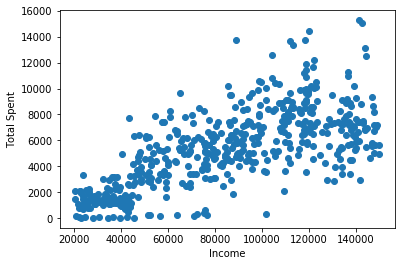

In [33]:
#INCOME is highly correlated with TOTAL SPENT thus we include it
import matplotlib.pyplot as plt 
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

In [35]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.322632696381397e-71)

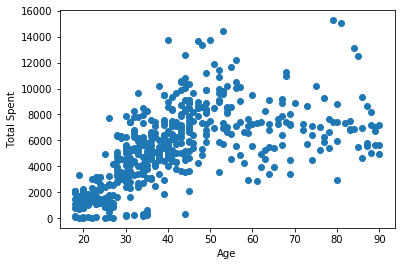

In [36]:
#AGE is highly correlated with TOTAL SPENT thus we include it
import matplotlib.pyplot as plt 
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total Spent")
plt.show()

In [38]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

(0.5760170677259271, 1.5608217502782303e-45)

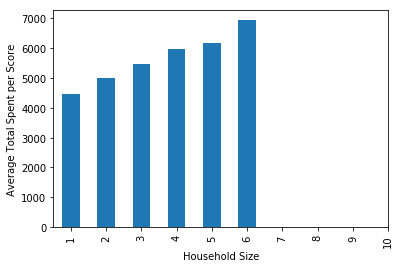

In [41]:
#Household Size is highly correlated with TOTAL SPENT thus we include it
table = customer_all_view.groupby(['HOUSEHOLD SIZE']).agg({'TOTAL SPENT':'mean'}).reset_index()
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Household Size")
plt.ylabel("Average Total Spent per size")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()

## Retrained Linear Regression Model

In [56]:
DF_input_2=customer_all_view[['AGE','INCOME', 'EXPERIENCE SCORE','LOYALTY GROUP','HOUSEHOLD SIZE']]
DF_input_2.head()

,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE
0,64,133498,5,enrolled,4
1,42,94475,9,notenrolled,6
2,40,88610,9,enrolled,5
3,38,84313,8,enrolled,1
4,30,51498,3,notenrolled,1


In [57]:
DF_input_2['LOYALTY GROUP']=DF_input_2['LOYALTY GROUP'].apply(encode_loyalty)
DF_input_2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE
0,64,133498,5,1,4
1,42,94475,9,0,6
2,40,88610,9,1,5
3,38,84313,8,1,1
4,30,51498,3,0,1


In [58]:
#min_max scaling
from sklearn import preprocessing
DF_input_2_column_names = DF_input_2.columns.values
DF_input_2_np=preprocessing.minmax_scale(DF_input_2)
Reg_input_scaled=pd.DataFrame(DF_input_2_np, columns=DF_input_2_column_names)
Reg_input_scaled.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64.


,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE
0,0.638889,0.872818,0.444444,1.0,0.6
1,0.333333,0.572046,0.888889,0.0,1.0
2,0.305556,0.526842,0.888889,1.0,0.8
3,0.277778,0.493722,0.777778,1.0,0.0
4,0.166667,0.240799,0.222222,0.0,0.0


In [59]:
#Create a train – test split of 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Reg_input_scaled,customer_all_view['TOTAL SPENT'], test_size=0.2,random_state=42)


In [60]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
#Trains the model on the training data set
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-7303.9974324  12603.96588313   490.22335566  1554.3041761
   922.7433108 ]


In [61]:
Reg_input_scaled.columns.values

array(['AGE', 'INCOME', 'EXPERIENCE SCORE', 'LOYALTY GROUP',
       'HOUSEHOLD SIZE'], dtype=object)

In [62]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 3158351.48
